# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [15]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm

Pretty printing has been turned ON


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [16]:
def conv_fn (x, h):
             
    len_x = len(x)
    len_h = len(h)
    len_X = len_x + 2*(len_h - 1)
    X = np.zeros(len_X)
    H = np.zeros(len_h)
    y = np.zeros(len_x + len_h - 1)
    
    #flip sequence of h
    for i in range(len_x):
        X[i + len_h - 1] = x[i]
        
    for j in range(len_h):
        H[j] = h[len_h -1 - j]

    
    for n in range(len_x + len_h - 1):
        for k in range(len_h):
            y[n] = y[n] + X[k + n]*H[k]
        
    return y
             
def dirac(n=0, N=20):
    if n > N - 1:
        raise ValueError('n should be inferior to N-1')
    
    s = np.zeros(N)
    s[n] = 1
    
    return s

def step(n = 0, N = 20):
    s = np.zeros(N)
    for i in range(N):
        s[i] = 1

    return s

def exp(n=0, N = 20):
    s = np.zeros(N)
    e = 2.718
    for k in range(N):
        s[k] = e**k
    
    return s
 

In [17]:
x = np.array([1,2,3,4])
h = dirac(0)

y1 = conv_fn(x,h)
print(y1)

h = step()

y2 = conv_fn(x,h)
print(y2)

h = exp()

y3 = conv_fn(x,h)
print(y3)

h = np.array([-1,1])
y4 = conv_fn(x,h)
print(y4)

[ 1.  2.  3.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.]
[  1.   3.   6.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.   9.   7.   4.]
[  1.00000000e+00   4.71800000e+00   1.58235240e+01   4.70083382e+01
   1.27768663e+02   3.47275227e+02   9.43894067e+02   2.56550407e+03
   6.97304007e+03   1.89527229e+04   5.15135009e+04   1.40013695e+05
   3.80557224e+05   1.03435453e+06   2.81137563e+06   7.64131895e+06
   2.07691049e+07   5.64504271e+07   1.53432261e+08   4.17028885e+08
   6.49324353e+08   7.96543275e+08   7.12524147e+08]
[-1. -1. -1. -1.  4.]


## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


In [90]:
def conv_2d(img, K):
    X = np.asarray(img)
    row_X,column_X = X.shape 
    r_k,c_k = K.shape
    L = int((r_k-1)/2)
    Y = np.zeros(X.shape)
    
    for m in range(L,row_X-L):
        for n in range(L, column_X-L): 
            for i in range(-L,L+1):
                for j in range(-L,L+1):
                    Y[m][n] = Y[m][n]+K[i+L][j+L]*X[m+i][n+j]

            
    return Y

In [91]:
M =np.array([[1, 4, 6, 4, 1], 
     [4, 16, 24, 16, 4], 
     [6, 24, 36, 24, 6],
     [4, 16, 24, 16, 4],
     [1, 4, 6, 4, 1]] )

M = M*float((1/256))

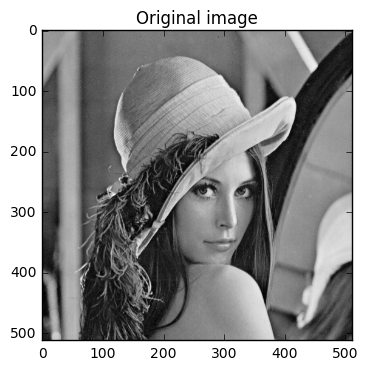

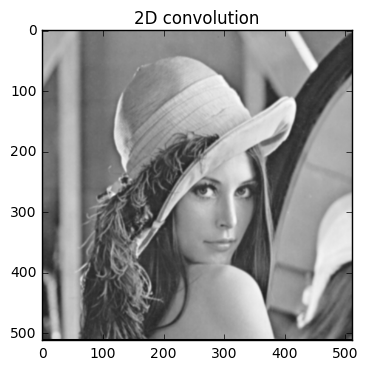

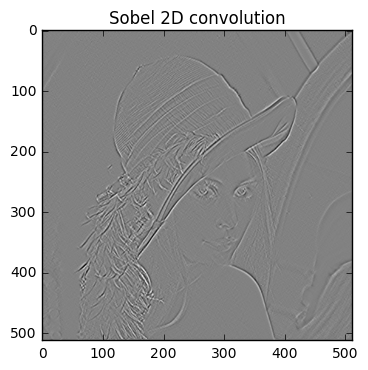

In [92]:
Path = '../images/'
image_name = 'lena-grey.bmp'
lena_im = io.imread(Path.__add__(image_name))
lena_im = img_as_float(lena_im)

plt.figure
plt.imshow(lena_im, cmap='gray')
plt.title('Original image')
plt.show()


CON_2D = conv_2d(lena_im, M)
plt.figure
plt.imshow(CON_2D, cmap='gray')
plt.title('2D convolution')
plt.show()

sobel_x = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
sobel_conv = conv_2d(conv_2d(lena_im, sobel_x),sobel_y)
plt.figure
plt.imshow(sobel_conv, cmap='gray')
plt.title('Sobel 2D convolution')
plt.show()



## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.

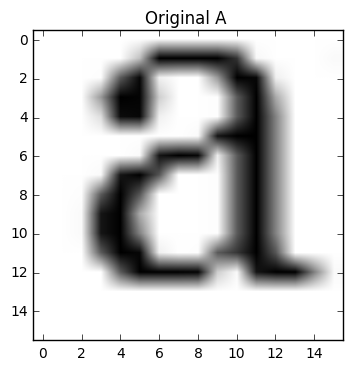

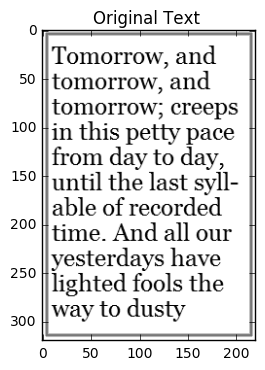

In [155]:
from skimage.filters import threshold_otsu
from scipy import signal
from scipy import misc


Path = '../images/'
image_name = 'a.png'
a_im = io.imread(Path.__add__(image_name),as_grey=True)
a_im = img_as_float(a_im)
plt.figure
plt.imshow(a_im,cmap=plt.cm.gray)
plt.title('Original A ')
plt.show()

Path = '../images/'
image_name = 'text.png'
text_im = io.imread(Path.__add__(image_name),as_grey=True)
text_im = img_as_float(text_im)
plt.figure
plt.imshow(text_im,cmap=plt.cm.gray)
plt.title('Original Text ')
plt.show()

In [161]:
thresh = threshold_otsu(a_im)
binary_a = a_im <= thresh

for n in range(0,a_im.shape[0]):
    for k in range(0,a_im.shape[1]):
        if a_im[n,k]>thresh:
            a_im[n,k]=0
        else:
            a_im[n,k]=1
               
thresh =threshold_otsu(text_im)
binary_t = text_im <= thresh

for n in range(0,text_im.shape[0]):
    for k in range(0,text_im.shape[1]):
        if text_im[n,k]>thresh:
            text_im[n,k]=0
        else:
            text_im[n,k]=1
            

corr = signal.correlate2d(text_im,a_im,boundary='symm', mode='same')
# find the match


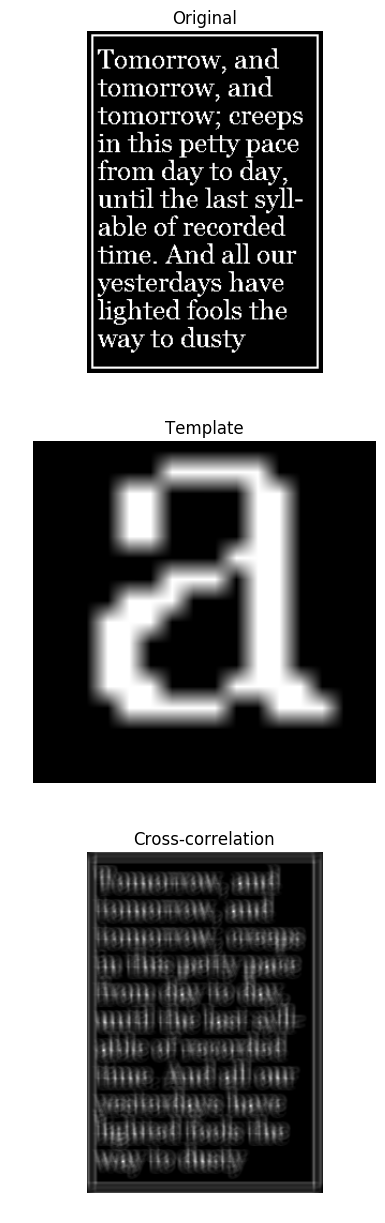

In [158]:
import matplotlib.pyplot as plt
fig, (ax_orig, ax_template, ax_corr) = plt.subplots(3, 1,figsize=(6, 15))
ax_orig.imshow(binary_t, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(binary_a, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()


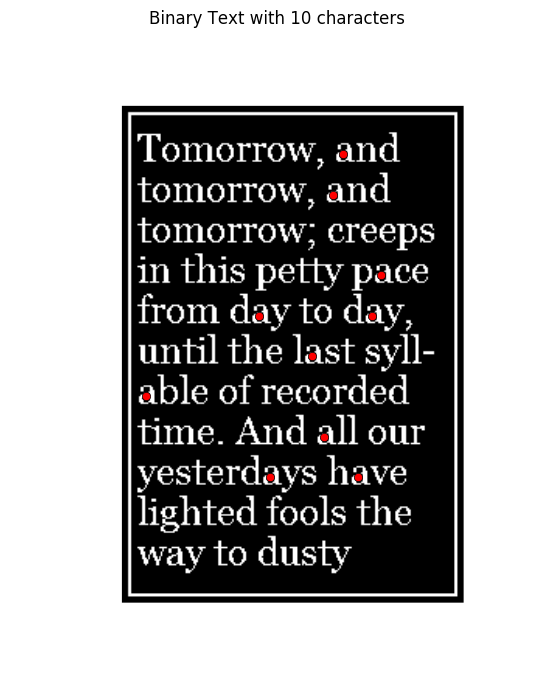

In [159]:
fig, (ax_orig) = plt.subplots(1, 1,figsize=(6, 15))
ax_orig.imshow(binary_t, cmap='gray')
ax_orig.set_title('Binary Text with 10 characters')
ax_orig.set_axis_off()

for count in range(0,10):
    y, x = np.unravel_index(np.argmax(corr), corr.shape)
    ax_orig.plot(x, y, 'ro')
    corr[y,x]=0